# Introdution

[*********************100%%**********************]  7 of 7 completed


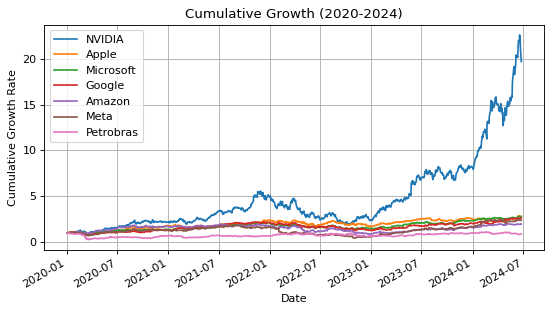

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
today = date.today()

# Define the ticker symbols
tickers = ['NVDA', 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'PBR']

# Fetch stock data for the tickers
data = yf.download(tickers, start='2020-01-01', end=today)['Close']

# Calculate daily returns
daily_returns = data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Define a dictionary to map tickers to company names
company_names = {
    'NVDA': 'NVIDIA',
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'GOOGL': 'Google',
    'AMZN': 'Amazon',
    'META': 'Meta',
    'PBR': 'Petrobras'
}

# Plot the cumulative returns
plt.figure(figsize=(7, 4),dpi=80)
for ticker in tickers:
    cumulative_returns[ticker].plot(label=company_names[ticker])

plt.title(f'Cumulative Growth (2020-{today.year})')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('figuras/cumulative_growth_rate.png')
plt.show()


# RNN

TypeError: hypersurface() missing 1 required positional argument: 'y'

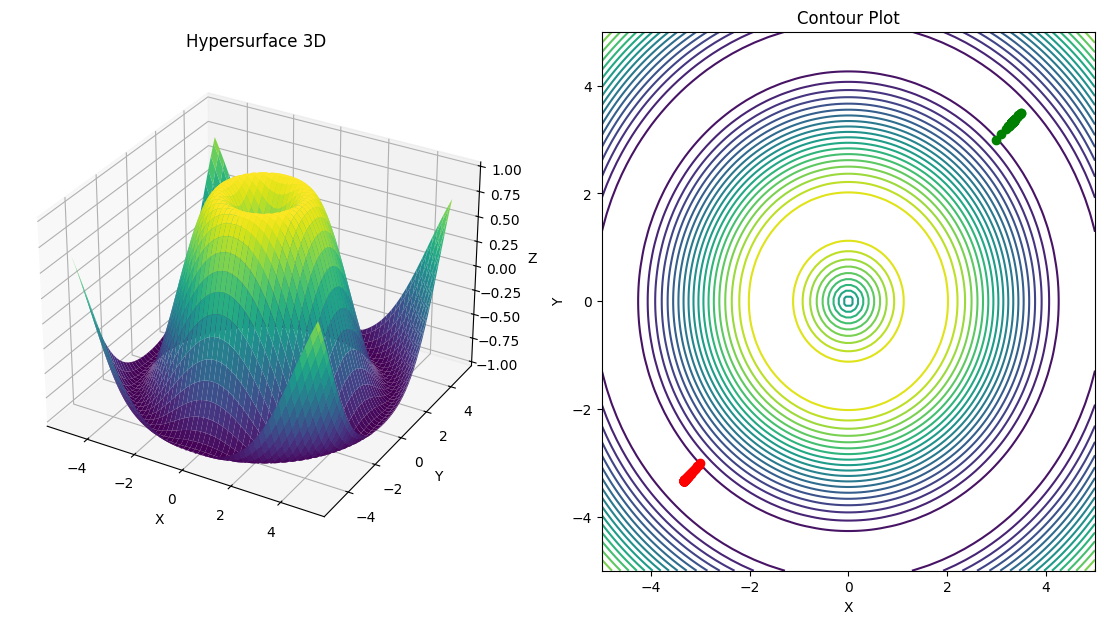

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Define the hypersurface function
def hypersurface(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Define the gradient of the hypersurface
def gradient(x):
    grad_x = x[0] / np.sqrt(x[0]**2 + x[1]**2) * np.cos(np.sqrt(x[0]**2 + x[1]**2))
    grad_y = x[1] / np.sqrt(x[0]**2 + x[1]**2) * np.cos(np.sqrt(x[0]**2 + x[1]**2))
    return np.array([grad_x, grad_y])

# Create the meshgrid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = hypersurface(x, y)

# Plot the 3D surface
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Hypersurface 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the contour map
ax2 = fig.add_subplot(122)
contour = ax2.contour(x, y, z, levels=20, cmap='viridis')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Optimization starting points
start_points = [(-3, -3), (3, 3), (-3, 3)]
methods = ['SGD', 'ADAM', 'LBFGS']
colors = ['r', 'g', 'b']

# Define the optimization methods
def sgd(x0, func, grad, learning_rate=0.1, n_iter=100):
    x = np.array(x0)
    path = [x]
    for i in range(n_iter):
        x = x - learning_rate * grad(x)
        path.append(x)
    return np.array(path)

def adam(x0, func, grad, learning_rate=0.1, n_iter=100, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = np.array(x0)
    path = [x]
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for i in range(1, n_iter + 1):
        g = grad(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)
        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        path.append(x)
    return np.array(path)

# Perform the optimization and plot the paths
for start, method, color in zip(start_points, methods, colors):
    if method == 'SGD':
        path = sgd(start, hypersurface, gradient)
    elif method == 'ADAM':
        path = adam(start, hypersurface, gradient)
    elif method == 'LBFGS':
        res = minimize(hypersurface, start, method='L-BFGS-B', jac=gradient)
        path = res['x']

    if method != 'LBFGS':
        ax2.plot(path[:, 0], path[:, 1], color=color, marker='o', label=f'{method} path')
    else:
        ax2.plot(path[0], path[1], color=color, marker='x', label=f'{method} endpoint')

ax2.legend()
# Define the hypersurface function that accepts a single vector input for optimization
def hypersurface_vec(x):
    return np.sin(np.sqrt(x[0]**2 + x[1]**2))

# Perform the optimization and plot the paths
for start, method, color in zip(start_points, methods, colors):
    if method == 'SGD':
        path = sgd(start, hypersurface_vec, gradient)
    elif method == 'ADAM':
        path = adam(start, hypersurface_vec, gradient)
    elif method == 'LBFGS':
        res = minimize(hypersurface_vec, start, method='L-BFGS-B', jac=gradient)
        path = res['x']

    if method != 'LBFGS':
        ax2.plot(path[:, 0], path[:, 1], color=color, marker='o', label=f'{method} path')
    else:
        ax2.plot(path[0], path[1], color=color, marker='x', label=f'{method} endpoint')

ax2.legend()

plt.show()


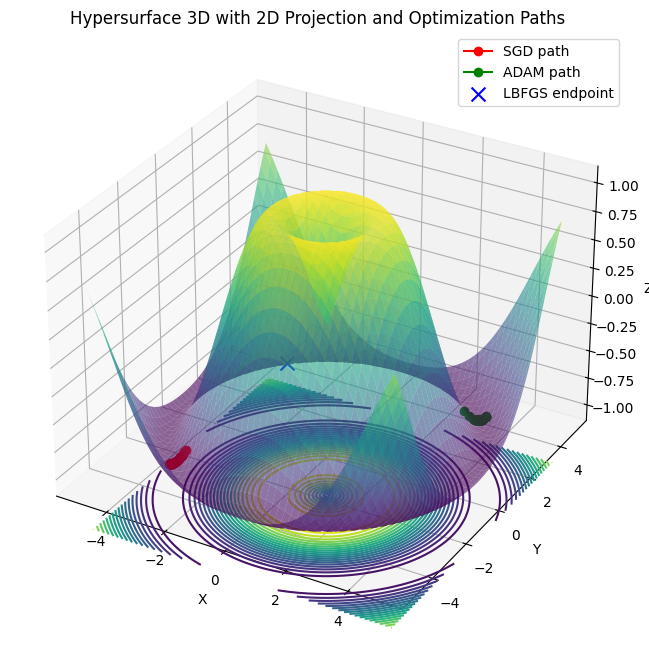

In [6]:

# Plot a combined 3D surface with reduced opacity and 2D projection on the XY plane
fig = plt.figure(figsize=(10, 8))

# 3D surface plot with reduced opacity and 2D projection on the XY plane
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x, y, z, levels=20, cmap='viridis', linestyles="solid", offset=-1.5)

# Perform the optimization and plot the paths again
for start, method, color in zip(start_points, methods, colors):
    if method == 'SGD':
        path = sgd(start, hypersurface_vec, gradient)
        ax.plot(path[:, 0], path[:, 1], hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'ADAM':
        path = adam(start, hypersurface_vec, gradient)
        ax.plot(path[:, 0], path[:, 1], hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'LBFGS':
        res = minimize(hypersurface_vec, start, method='L-BFGS-B', jac=gradient)
        path = res['x']
        ax.scatter(path[0], path[1], hypersurface(path[0], path[1]), color=color, marker='x', s=100, label=f'{method} endpoint')

ax.set_title('Hypersurface 3D with 2D Projection and Optimization Paths')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


In [1]:
# Define a more irregular hypersurface function that accepts a single vector input for optimization

def irregular_hypersurface(x, y):
    # return ((x**2 -1)*(y**2 -4) + x**2 + y**2-5)/(x**2 + y**2 + 1)**2 
    return x*(np.exp(-x**2-y**2 -x*y))
    

def irregular_hypersurface_vec(x):
    #return ((x[0]**2 -1)*(x[1]**2 -4) + x[0]**2 + x[1]**2-5)/(x[0]**2 + x[1]**2 + 1)**2
    return x[0]*(np.exp(-x[0]**2-x[1]**2- x[0]*x[1] ))
# Create the meshgrid for the irregular surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = irregular_hypersurface(x, y)

# Perform the optimization and plot the paths again for the irregular surface
fig = plt.figure(figsize=(10, 8))

# 3D surface plot with reduced opacity and 2D projection on the XY plane
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x, y, z, levels=20, cmap='viridis', linestyles="solid", offset=-2)

# Perform the optimization and plot the paths again for the irregular surface
for start, method, color in zip(start_points, methods, colors):
    if method == 'SGD':
        path = sgd(start, irregular_hypersurface_vec, gradient)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'ADAM':
        path = adam(start, irregular_hypersurface_vec, gradient)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'LBFGS':
        res = minimize(irregular_hypersurface_vec, start, method='L-BFGS-B', jac=gradient)
        path = res['x']
        ax.scatter(path[0], path[1], irregular_hypersurface(path[0], path[1]), color=color, marker='x', s=100, label=f'{method} endpoint')

ax.set_title('Irregular Hypersurface 3D with 2D Projection and Optimization Paths')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


NameError: name 'np' is not defined

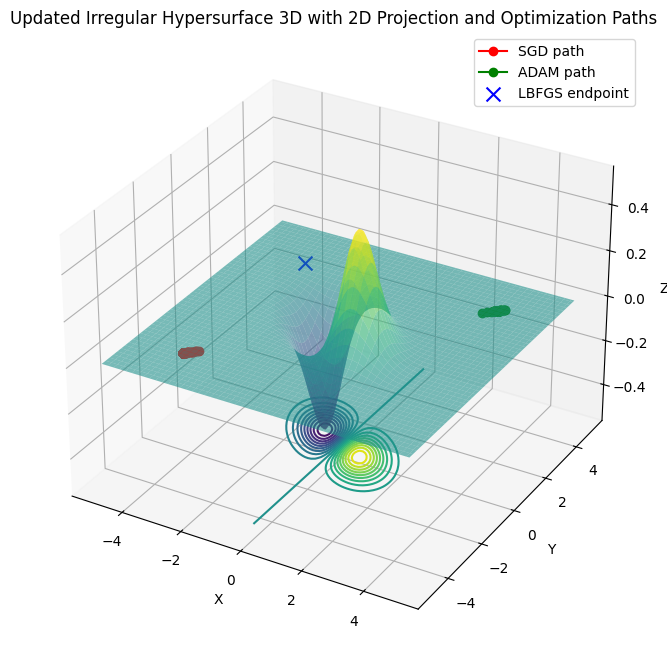

In [25]:
# Update the irregular hypersurface functions
def irregular_hypersurface(x, y):
    return x * np.exp(-x**2 - y**2 - x*y)

def irregular_hypersurface_vec(x):
    return x[0] * np.exp(-x[0]**2 - x[1]**2 - x[0]*x[1])

# Create the meshgrid for the updated irregular surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = irregular_hypersurface(x, y)

# Perform the optimization and plot the paths again for the updated irregular surface with more points
fig = plt.figure(figsize=(10, 8))

# 3D surface plot with reduced opacity and 2D projection on the XY plane
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x, y, z, levels=20, cmap='viridis', linestyles="solid", offset=-0.5)

# Perform the optimization and plot the paths again for the updated irregular surface
for start, method, color in zip(start_points, methods, colors):
    if method == 'SGD':
        path = sgd(start, irregular_hypersurface_vec, gradient, n_iter=200)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'ADAM':
        path = adam(start, irregular_hypersurface_vec, gradient, n_iter=200)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'LBFGS':
        res = minimize(irregular_hypersurface_vec, start, method='L-BFGS-B', jac=gradient)
        path = res['x']
        ax.scatter(path[0], path[1], irregular_hypersurface(path[0], path[1]), color=color, marker='x', s=100, label=f'{method} endpoint')

ax.set_title('Updated Irregular Hypersurface 3D with 2D Projection and Optimization Paths')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


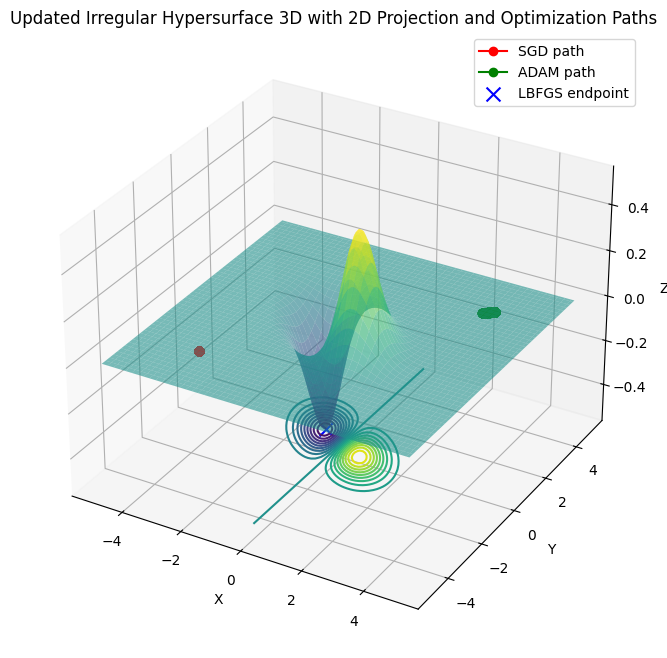

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Define the irregular hypersurface function
def irregular_hypersurface(x, y):
    return x * np.exp(-x**2 - y**2 - x*y)

# Define the vectorized version of the irregular hypersurface function for optimization
def irregular_hypersurface_vec(x):
    return x[0] * np.exp(-x[0]**2 - x[1]**2 - x[0]*x[1])

# Define the gradient of the hypersurface
def gradient(x):
    grad_x = np.exp(-x[0]**2 - x[1]**2 - x[0]*x[1]) * (1 - 2*x[0]**2 - x[1] - 2*x[0]*x[1])
    grad_y = np.exp(-x[0]**2 - x[1]**2 - x[0]*x[1]) * (-2*x[0]*x[1] - x[0]**2)
    return np.array([grad_x, grad_y])

# Optimization algorithms
def sgd(x0, func, grad, learning_rate=0.1, n_iter=200):
    x = np.array(x0)
    path = [x]
    for i in range(n_iter):
        x = x - learning_rate * grad(x)
        path.append(x)
    return np.array(path)

def adam(x0, func, grad, learning_rate=0.1, n_iter=200, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = np.array(x0)
    path = [x]
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for i in range(1, n_iter + 1):
        g = grad(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)
        x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        path.append(x)
    return np.array(path)

# Create the meshgrid for the updated irregular surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = irregular_hypersurface(x, y)

# Plot a combined 3D surface with reduced opacity and 2D projection on the XY plane for the updated irregular surface
fig = plt.figure(figsize=(10, 8))

# 3D surface plot with reduced opacity and 2D projection on the XY plane
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x, y, z, levels=20, cmap='viridis', linestyles="solid", offset=-0.5)

# Optimization starting points
start_points = [(-3, -3), (3, 3), (-3, 3)]
methods = ['SGD', 'ADAM', 'LBFGS']
colors = ['r', 'g', 'b']

# Perform the optimization and plot the paths again for the updated irregular surface
for start, method, color in zip(start_points, methods, colors):
    if method == 'SGD':
        path = sgd(start, irregular_hypersurface_vec, gradient, n_iter=20000)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'ADAM':
        path = adam(start, irregular_hypersurface_vec, gradient, n_iter=10000)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'LBFGS':
        res = minimize(irregular_hypersurface_vec, start, method='L-BFGS-B', jac=gradient)
        path = res['x']
        ax.scatter(path[0], path[1], irregular_hypersurface(path[0], path[1]), color=color, marker='x', s=100, label=f'{method} endpoint')

ax.set_title('Updated Irregular Hypersurface 3D with 2D Projection and Optimization Paths')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


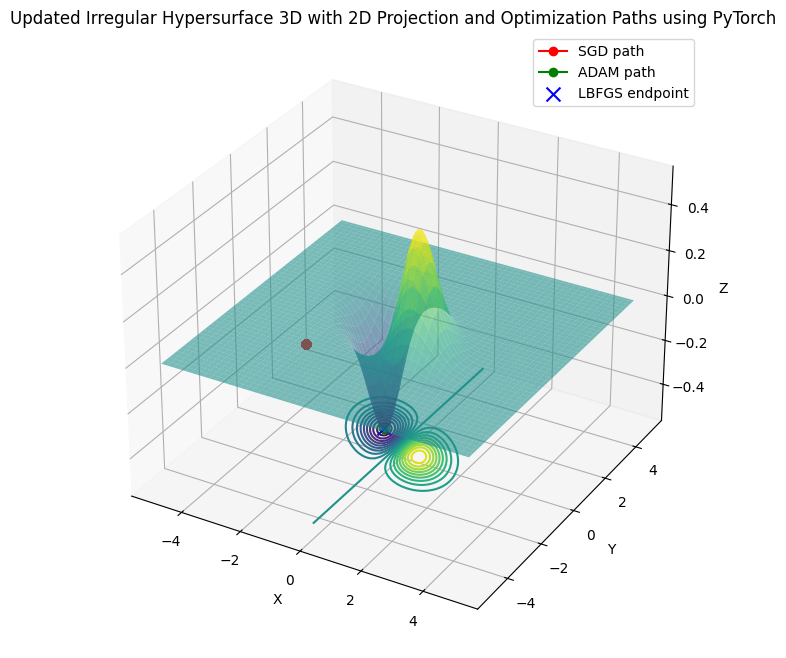

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.optim as optim
from scipy.optimize import minimize

# Define the irregular hypersurface function
def irregular_hypersurface(x, y):
    return x * np.exp(-x**2 - y**2 - x*y)

# Define the vectorized version of the irregular hypersurface function for optimization
def irregular_hypersurface_vec(x):
    return x[0] * np.exp(-x[0]**2 - x[1]**2 - x[0]*x[1])

# Define the irregular hypersurface function using PyTorch
def irregular_hypersurface_torch(x):
    return x[0] * torch.exp(-x[0]**2 - x[1]**2 - x[0]*x[1])

# Optimization algorithms using PyTorch
def sgd_torch(x0, func, learning_rate=0.1, n_iter=500):
    x = torch.tensor(x0, requires_grad=True, dtype=torch.float32)
    optimizer = optim.SGD([x], lr=learning_rate)
    path = [x.detach().numpy()]
    for _ in range(n_iter):
        optimizer.zero_grad()
        z = func(x)
        z.backward()
        optimizer.step()
        path.append(x.detach().numpy())
    return np.array(path)

def adam_torch(x0, func, learning_rate=0.1, n_iter=500):
    x = torch.tensor(x0, requires_grad=True, dtype=torch.float32)
    optimizer = optim.Adam([x], lr=learning_rate)
    path = [x.detach().numpy()]
    for _ in range(n_iter):
        optimizer.zero_grad()
        z = func(x)
        z.backward()
        optimizer.step()
        path.append(x.detach().numpy())
    return np.array(path)

# Create the meshgrid for the updated irregular surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = irregular_hypersurface(x, y)

# Plot a combined 3D surface with reduced opacity and 2D projection on the XY plane for the updated irregular surface
fig = plt.figure(figsize=(10, 8))

# 3D surface plot with reduced opacity and 2D projection on the XY plane
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.contour(x, y, z, levels=20, cmap='viridis', linestyles="solid", offset=-0.5)

# Optimization starting point
start_point = (-2, -2)
methods = ['SGD', 'ADAM', 'LBFGS']
colors = ['r', 'g', 'b']

# Perform the optimization and plot the paths again for the updated irregular surface using PyTorch
for method, color in zip(methods, colors):
    if method == 'SGD':
        path = sgd_torch(start_point, irregular_hypersurface_torch, n_iter=500)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'ADAM':
        path = adam_torch(start_point, irregular_hypersurface_torch, n_iter=500)
        ax.plot(path[:, 0], path[:, 1], irregular_hypersurface(path[:, 0], path[:, 1]), color=color, marker='o', label=f'{method} path')
    elif method == 'LBFGS':
        res = minimize(irregular_hypersurface_vec, start_point, method='L-BFGS-B')
        path = res['x']
        ax.scatter(path[0], path[1], irregular_hypersurface(path[0], path[1]), color=color, marker='x', s=100, label=f'{method} endpoint')

ax.set_title('Updated Irregular Hypersurface 3D with 2D Projection and Optimization Paths using PyTorch')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
